# Banglore Houses price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\Machine_Learning\projects\Bengaluru_House_Data.csv')
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Dataset Description: 
https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data </br>
<b>area_type </b>:  indicates wether this is located in plot area, build up area or carpet area etc.</br>

<b>avalibility :</b> it tells us when we can shift into house .</br>

<b>location :</b> Describes location of the house in Benguluru.</br>

<b>size :</b> indicates number of bedrooms presented in that perticular house.</br>

<b>society:</b> indicates name of that community or name of that estates.</br>

<b>total_sqft :</b> indicates That house constructed in how many squre feets(size of land).</br>

<b>bath:</b> Number of bath rooms.</br>

<b>balcony :</b> Bulconies.</br>

<b>Price:</b> House price depends on above features.i.price*100 per sqft (Ex: 1056*39.07*100 = 412592 rupees)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [5]:
for column in df.columns:
    print(column," : ", df[column].nunique())
    

area_type  :  4
availability  :  81
location  :  1305
size  :  31
society  :  2688
total_sqft  :  2117
bath  :  19
balcony  :  4
price  :  1994


In [6]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
for column in df.columns:
    print(df[column].value_counts())
    print('- -'*25)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout           

In [8]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<h3>Data preprocessing or Data Wrangling</h3>

In [9]:
df['bedrooms'] = df['size'].fillna('2 BKH')

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
bedrooms           0
dtype: int64

In [11]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [12]:
df['bath'] = df['bath'].fillna(df['bath'].ffill())

In [13]:
df['bath'].value_counts()

2.0     6950
3.0     3303
4.0     1232
1.0      792
5.0      526
6.0      275
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [14]:
df = df.drop(columns=['availability', 'size','society'], axis=1)
df.head(10)

,area_type,location,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2 BHK
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4 Bedroom
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3 BHK
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3 BHK
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2 BHK
5,Super built-up Area,Whitefield,1170,2.0,1.0,38.00,2 BHK
6,Super built-up Area,Old Airport Road,2732,4.0,2.0,204.00,4 BHK
7,Super built-up Area,Rajaji Nagar,3300,4.0,2.0,600.00,4 BHK
8,Super built-up Area,Marathahalli,1310,3.0,1.0,63.25,3 BHK
9,Plot Area,Gandhi Bazar,1020,6.0,2.0,370.00,6 Bedroom


In [15]:
df.iloc[13319:]

,area_type,location,total_sqft,bath,balcony,price,bedrooms
13319,Super built-up Area,Doddathoguru,550,1.0,1.0,17.0,1 BHK


In [16]:
df['bedrooms'] = df['bedrooms'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df.head(5)

,area_type,location,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [18]:
df['total_sqft'].dtypes

dtype('O')

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,bedrooms
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [21]:
df['total_sqft'].dtypes

dtype('O')

In [22]:
df.shape

(13320, 7)

In [23]:
def total_sqft_2_num(x):
    tokens = x.split('-')
    #print(tokens)
    #print(len(tokens))
    if len(tokens) == 2:
        #return (float(tokens[0]+ tokens[1]))/2
        return (float(tokens[0])+float(tokens[1]))/2
    
    else:
        try:
            return float(x)
        except:
            return None

In [24]:
df['total_sqft'] = df['total_sqft'].apply(total_sqft_2_num)

In [25]:
df.head(10)

,area_type,location,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,2732.0,4.0,2.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,2.0,600.00,4
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,1020.0,6.0,2.0,370.00,6


<h3>Feature Engineering</h3>

In [26]:
df['price_per_sqft'] =  (df['price']*100000)/df['total_sqft']
df.head(10)

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,Gandhi Bazar,1020.0,6.0,2.0,370.00,6,36274.509804


In [27]:
print(df['location'].nunique())
df['location'].value_counts()

1305


Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [28]:
df['location'].dtype

dtype('O')

In [29]:
df['location'] = df['location'].apply(lambda x:str(x).strip())

In [30]:
locations = df['location'].value_counts()
locations

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [31]:
locations = locations[locations<=10]
locations

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [32]:
df['location'] = df['location'].apply(lambda x: 'other' if x in locations else x)

In [33]:
print(df['location'].nunique())
df['location'].value_counts()

242


other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [34]:
df.head(10)

,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,other,1020.0,6.0,2.0,370.00,6,36274.509804


In [35]:
df.describe()

,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.691742,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.339907,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


<h3>Outlayer detection and Removal</h3>

In [36]:
(df['total_sqft'] / df['bedrooms']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [37]:
df = df[((df['total_sqft'] / df['bedrooms']) >=300)]
df.describe()

,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.562650,1.604629,111.382401,2.650838,6303.979357
std,1261.271296,1.079834,0.796238,152.077329,0.976678,4162.237981
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [38]:
df.total_sqft.describe()

count    12530.000000
mean      1594.564544
std       1261.271296
min        300.000000
25%       1116.000000
50%       1300.000000
75%       1700.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [39]:
df.bath.describe()

count    12530.000000
mean         2.562650
std          1.079834
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: bath, dtype: float64

In [40]:
df.balcony.describe()

count    12530.000000
mean         1.604629
std          0.796238
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [41]:
df.price.describe()

count    12530.000000
mean       111.382401
std        152.077329
min          8.440000
25%         49.000000
50%         70.000000
75%        115.000000
max       3600.000000
Name: price, dtype: float64

In [42]:
df.bedrooms.describe()

count    12530.000000
mean         2.650838
std          0.976678
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         16.000000
Name: bedrooms, dtype: float64

In [43]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<Axes: >

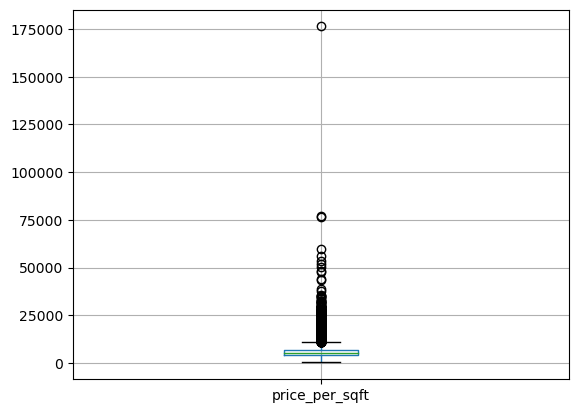

In [44]:
import matplotlib.pyplot as plt
df.boxplot('price_per_sqft')

In [45]:
def remove_outliers_price_per_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean=np.mean(subdf.price_per_sqft)
        st_dev= np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (mean-st_dev)) & (subdf.price_per_sqft <= (mean+st_dev))]
        df_output = pd.concat([df_output, gen_df], ignore_index=True)
    return df_output


In [46]:
df= remove_outliers_price_per_sqft(df)
df.describe()

,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.474323,1.607514,91.286372,2.574896,5659.062876
std,880.694214,0.981601,0.786178,86.342786,0.897649,2265.774749
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,1.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [47]:
df.boxplot('price_per_sqft')

<Axes: >

In [48]:
def remove_outliers_bedrooms(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats= {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices =np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)            
    return df.drop(exclude_indices, axis='index')

In [49]:
df = remove_outliers_bedrooms(df)
df.describe()

,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
count,7361.000000,7361.000000,7361.000000,7361.000000,7361.000000,7361.000000
mean,1496.942529,2.450618,1.565141,99.093113,2.500611,6127.640136
std,865.781990,1.013516,0.779755,93.336841,0.929312,2408.997210
min,300.000000,1.000000,0.000000,10.000000,1.000000,1300.000000
25%,1096.000000,2.000000,1.000000,50.000000,2.000000,4600.000000
50%,1260.000000,2.000000,2.000000,73.200000,2.000000,5680.000000
75%,1680.000000,3.000000,2.000000,113.000000,3.000000,6896.551724
max,30000.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [50]:
print(df.shape)
df.head(10)


(7361, 8)


,area_type,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
5,Super built-up Area,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,15018.181818
6,Super built-up Area,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,15020.408163
8,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667
9,Built-up Area,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,5666.666667
10,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,10169.491525


<h3>Dropping unwanted columns</h3>

In [51]:
final_data = df.drop('price_per_sqft', axis= 1)
final_data.head(10)

,area_type,location,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
5,Super built-up Area,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4
6,Super built-up Area,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4
8,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3
9,Built-up Area,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5
10,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3


In [52]:
#X = final_data.iloc[:, 'area_type','location','total_sqft','bath','balcony','bedrooms']
X = final_data.drop('price', axis=1)
y = final_data['price']
print(X.shape, y.shape)

(7361, 6) (7361,)


<h3> Importing required Libraries</h3>

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

<h4>Creating dummies for Categorical columns using One hot encoding</h4>

In [54]:
X_dummies = pd.get_dummies(X, columns=['area_type', 'location'], drop_first=True)

In [55]:
X_dummies.isna().sum()

total_sqft                     0
bath                           0
balcony                        0
bedrooms                       0
area_type_Carpet  Area         0
                              ..
location_Yelahanka             0
location_Yelahanka New Town    0
location_Yelenahalli           0
location_Yeshwanthpur          0
location_other                 0
Length: 248, dtype: int64

<h3> Data splitting for Training and Testing</h3>

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y , test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5888, 248) (1473, 248) (5888,) (1473,)


In [57]:
X_train.isna().sum()

total_sqft                     0
bath                           0
balcony                        0
bedrooms                       0
area_type_Carpet  Area         0
                              ..
location_Yelahanka             0
location_Yelahanka New Town    0
location_Yelenahalli           0
location_Yeshwanthpur          0
location_other                 0
Length: 248, dtype: int64

<h3>Normalizing the Train and Test data using Standard scalar</h3>

In [58]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

<h3>Applying Linear regression</h3>

In [59]:
model_1 = LinearRegression()
model_1.fit(X_train_scale, y_train)

LinearRegression()

In [60]:
y_pred = model_1.predict(X_test_scale)

y_pred_train = model_1.predict(X_train_scale)

In [61]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2_score_test: ' , r2_score(y_test, y_pred))
print('r2_score_train: ' , r2_score(y_train, y_pred_train))
print('mse: ' , mean_squared_error(y_test, y_pred))

r2_score_test:  0.6761252425339468
r2_score_train:  0.8629700432044574
mse:  1967.0383937830934


In [62]:
#Using funtions
from sklearn.metrics import r2_score, mean_squared_error
def linear(X_train_scale, y_train, X_test_scale , y_test):
    model_1 = LinearRegression()
    model_1.fit(X_train_scale, y_train)
    
    y_pred = model_1.predict(X_test_scale)
    y_pred_train = model_1.predict(X_train_scale)
    
    print('r2_score_test: ' , r2_score(y_test, y_pred))
    print('r2_score_train: ' , r2_score(y_train, y_pred_train))
    print('mse: ' , mean_squared_error(y_test, y_pred))

In [63]:
linear(X_train_scale, y_train, X_test_scale , y_test)

r2_score_test:  0.6761252425339468
r2_score_train:  0.8629700432044574
mse:  1967.0383937830934


<h4>Above scores we can see Model performed well on Training data , but not on Test data, so it is overfitted.</h4>
<h3> Slove overfitting problem using Lasso or L1 reqularization</h3>

In [64]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
def lasso(X_train_scale, y_train, X_test_scale , y_test):
    model_2 = Lasso()
    model_2.fit(X_train_scale, y_train)
    
    y_pred = model_2.predict(X_test_scale)
    y_pred_train = model_2.predict(X_train_scale)
    
    print('r2_score_test: ' , r2_score(y_test, y_pred))
    print('r2_score_train: ' , r2_score(y_train, y_pred_train))
    print('mse: ' , mean_squared_error(y_test, y_pred))

In [65]:
lasso(X_train_scale, y_train, X_test_scale , y_test)

r2_score_test:  0.7862265570478564
r2_score_train:  0.8483584571142899
mse:  1298.3431408733386


<h3>Apply L2 or Ridge regularization</h3>

In [66]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
def ridge(X_train_scale, y_train, X_test_scale , y_test):
    model_3 = Ridge()
    model_3.fit(X_train_scale, y_train)
    
    y_pred = model_3.predict(X_test_scale)
    y_pred_train = model_3.predict(X_train_scale)
    
    print('r2_score_test: ' , r2_score(y_test, y_pred))
    print('r2_score_train: ' , r2_score(y_train, y_pred_train))
    print('mse: ' , mean_squared_error(y_test, y_pred))

In [67]:
ridge(X_train_scale, y_train, X_test_scale , y_test)

r2_score_test:  0.7099720208156667
r2_score_train:  0.8629257399441248
mse:  1761.4715477994725


<h3>Applying Elastic Net</h3>  <h3>L1 + L2 </h3>

In [68]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
def elastic(X_train_scale, y_train, X_test_scale , y_test):
    model_4 = ElasticNet()
    model_4.fit(X_train_scale, y_train)
    
    y_pred = model_4.predict(X_test_scale)
    y_pred_train = model_4.predict(X_train_scale)
    
    print('r2_score_test: ' , r2_score(y_test, y_pred))
    print('r2_score_train: ' , r2_score(y_train, y_pred_train))
    print('mse: ' , mean_squared_error(y_test, y_pred))

In [69]:
elastic(X_train_scale, y_train, X_test_scale , y_test)

r2_score_test:  0.7949440583652133
r2_score_train:  0.7788073274760301
mse:  1245.3977989045593


<h3>Hyper parameter tuning using cross validation @Grid search cv</h3>

In [70]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

           
  # 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = Lasso(), 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_scale, y_train)         

Fitting 5 folds for each of 13 candidates, totalling 65 fits


C:\Users\Siva Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.045e+06, tolerance: 4.687e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Siva Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.072e+06, tolerance: 4.717e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Siva Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.00

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='r2', verbose=1)

In [71]:
res = pd.DataFrame(model_cv.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.146304,1.418590e-01,0.006248,0.007653,0.0001,{'alpha': 0.0001},0.853996,0.850568,0.879199,0.790094,...,0.847813,0.030545,1,0.862236,0.864019,0.853057,0.884183,0.860339,0.864767,0.010399
1,2.229091,3.116527e-02,0.006247,0.007651,0.001,{'alpha': 0.001},0.853760,0.850734,0.879224,0.790116,...,0.847726,0.030489,2,0.862198,0.863974,0.853009,0.884147,0.860269,0.864719,0.010405
2,2.047220,5.090003e-01,0.000000,0.000000,0.01,{'alpha': 0.01},0.850960,0.851258,0.878808,0.790283,...,0.846394,0.029824,3,0.861136,0.862726,0.851698,0.882908,0.859366,0.863567,0.010385
3,0.181207,2.897346e-02,0.000000,0.000000,0.05,{'alpha': 0.05},0.849919,0.850453,0.878554,0.790254,...,0.845724,0.029607,5,0.860205,0.861034,0.850156,0.880757,0.859026,0.862236,0.010048
4,0.103101,7.653157e-03,0.003124,0.006248,0.1,{'alpha': 0.1},0.850551,0.850074,0.879064,0.790016,...,0.845761,0.029786,4,0.859976,0.860800,0.849892,0.880471,0.858812,0.861990,0.010035
5,0.078106,9.880007e-03,0.000000,0.000000,0.2,{'alpha': 0.2},0.851101,0.848764,0.879921,0.789115,...,0.845374,0.030204,6,0.859291,0.860117,0.849146,0.879651,0.858054,0.861252,0.010004
6,0.068733,7.653390e-03,0.000000,0.000000,0.3,{'alpha': 0.3},0.850890,0.847071,0.880430,0.787878,...,0.844586,0.030634,7,0.858310,0.859197,0.848062,0.878542,0.856997,0.860222,0.009986
7,0.059361,6.248283e-03,0.009373,0.007653,0.4,{'alpha': 0.4},0.850579,0.845288,0.880946,0.786489,...,0.843743,0.031136,8,0.857172,0.858097,0.846760,0.877199,0.855707,0.858987,0.009960
8,0.062485,3.110060e-06,0.003124,0.006249,0.5,{'alpha': 0.5},0.850036,0.843369,0.881320,0.784978,...,0.842731,0.031636,9,0.855909,0.856850,0.845310,0.875761,0.854222,0.857610,0.009957
9,0.053112,7.652748e-03,0.003124,0.006249,0.6,{'alpha': 0.6},0.849339,0.841406,0.881463,0.783446,...,0.841633,0.032093,10,0.854552,0.855498,0.843735,0.874255,0.852700,0.856148,0.009968


In [72]:
model_cv.best_params_

{'alpha': 0.0001}

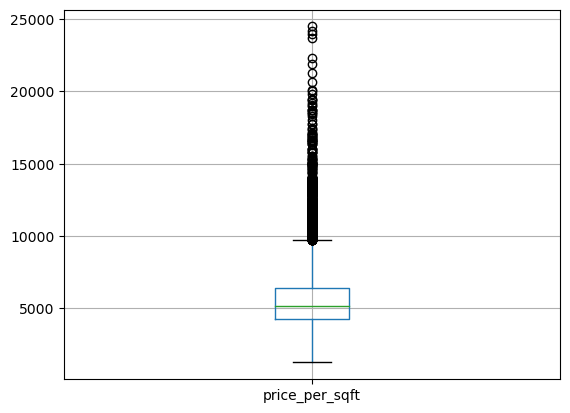

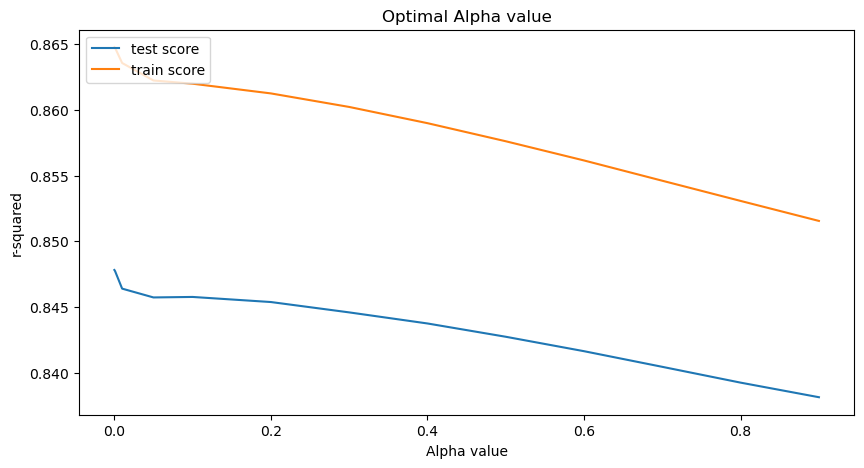

In [73]:
plt.figure(figsize=(10,5))

plt.plot(res["param_alpha"], res["mean_test_score"])
plt.plot(res["param_alpha"], res["mean_train_score"])
plt.xlabel('Alpha value')
plt.ylabel('r-squared')
plt.title("Optimal Alpha value")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [74]:
alpha = 0.0001

# Initialising Ridge() with above alpha
ls =Lasso(alpha=alpha)

#fitting model
ls.fit(X_train_scale,y_train)

#printing ridge coeficients
#ls.coef_

C:\Users\Siva Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.605e+06, tolerance: 5.516e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

In [75]:
y_pred = ls.predict(X_test_scale)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.7071385677402962


In [76]:
from sklearn.feature_selection import RFE
#RFE is used to get important f
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}


model_cv = GridSearchCV(estimator = ElasticNet(), 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_scale, y_train)           

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\Siva Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.128e+06, tolerance: 4.687e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Siva Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.135e+06, tolerance: 4.717e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Siva Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.07

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
res = pd.DataFrame(model_cv.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.202921,0.013153,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.853911,0.850641,0.879251,0.790096,...,0.847802,0.030542,1,0.862225,0.864001,0.853039,0.884169,0.860324,0.864752,0.010400
1,2.248022,0.013557,0.006249,0.007653,0.001,{'alpha': 0.001},0.853019,0.851094,0.879615,0.790112,...,0.847554,0.030457,2,0.862015,0.863691,0.852736,0.883886,0.860104,0.864487,0.010396
2,0.818581,0.102969,0.003124,0.006249,0.01,{'alpha': 0.01},0.850196,0.850629,0.882475,0.789680,...,0.846692,0.030818,4,0.860836,0.861940,0.851004,0.881914,0.859343,0.863008,0.010206
3,0.184330,0.018216,0.003124,0.006249,0.05,{'alpha': 0.05},0.848815,0.848372,0.894129,0.786670,...,0.847226,0.034612,3,0.859848,0.860738,0.849220,0.880407,0.858441,0.861731,0.010205
4,0.109349,0.009880,0.000000,0.000000,0.1,{'alpha': 0.1},0.847499,0.845438,0.901984,0.782451,...,0.846485,0.038094,5,0.858244,0.859128,0.846191,0.878437,0.856487,0.859697,0.010453
5,0.081230,0.006249,0.003124,0.006248,0.2,{'alpha': 0.2},0.843552,0.838368,0.904602,0.772976,...,0.841231,0.041756,6,0.853080,0.854044,0.837824,0.872521,0.850204,0.853535,0.011126
6,0.081231,0.015306,0.003124,0.006249,0.3,{'alpha': 0.3},0.838443,0.830490,0.898535,0.762859,...,0.833330,0.043037,7,0.846213,0.847312,0.827881,0.864765,0.841995,0.845633,0.011811
7,0.071858,0.007653,0.003124,0.006249,0.4,{'alpha': 0.4},0.832513,0.822112,0.888505,0.752497,...,0.824119,0.043244,8,0.838296,0.839566,0.817470,0.855951,0.832753,0.836807,0.012383
8,0.074982,0.006248,0.003124,0.006249,0.5,{'alpha': 0.5},0.826017,0.813483,0.876767,0.742192,...,0.814311,0.042991,9,0.829758,0.831239,0.806980,0.846615,0.822962,0.827511,0.012854
9,0.065609,0.006249,0.003124,0.006249,0.6,{'alpha': 0.6},0.819200,0.804876,0.864362,0.732003,...,0.804298,0.042585,10,0.820917,0.822622,0.796598,0.836985,0.812937,0.818012,0.013221


In [78]:
model_cv.best_params_

{'alpha': 0.0001}

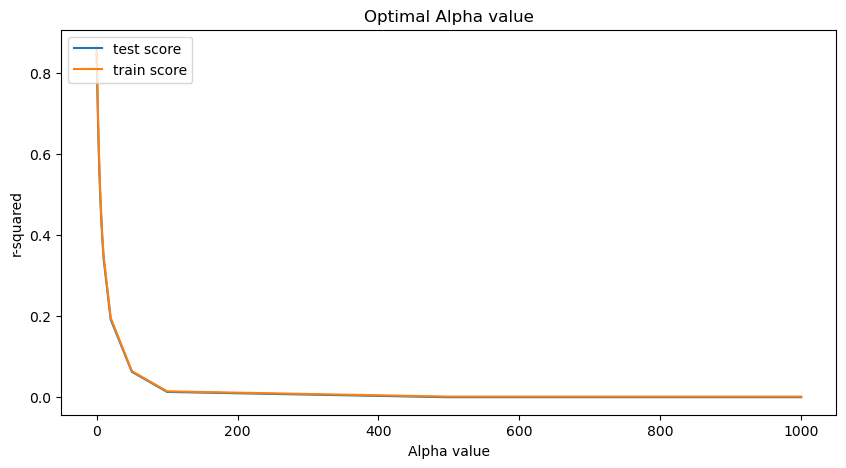

In [79]:
plt.figure(figsize=(10,5))

plt.plot(res["param_alpha"], res["mean_test_score"])
plt.plot(res["param_alpha"], res["mean_train_score"])
plt.xlabel('Alpha value')
plt.ylabel('r-squared')
plt.title("Optimal Alpha value")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=50]

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.202921,0.013153,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.853911,0.850641,0.879251,0.790096,...,0.847802,0.030542,1,0.862225,0.864001,0.853039,0.884169,0.860324,0.864752,0.010400
1,2.248022,0.013557,0.006249,0.007653,0.001,{'alpha': 0.001},0.853019,0.851094,0.879615,0.790112,...,0.847554,0.030457,2,0.862015,0.863691,0.852736,0.883886,0.860104,0.864487,0.010396
2,0.818581,0.102969,0.003124,0.006249,0.01,{'alpha': 0.01},0.850196,0.850629,0.882475,0.789680,...,0.846692,0.030818,4,0.860836,0.861940,0.851004,0.881914,0.859343,0.863008,0.010206
3,0.184330,0.018216,0.003124,0.006249,0.05,{'alpha': 0.05},0.848815,0.848372,0.894129,0.786670,...,0.847226,0.034612,3,0.859848,0.860738,0.849220,0.880407,0.858441,0.861731,0.010205
4,0.109349,0.009880,0.000000,0.000000,0.1,{'alpha': 0.1},0.847499,0.845438,0.901984,0.782451,...,0.846485,0.038094,5,0.858244,0.859128,0.846191,0.878437,0.856487,0.859697,0.010453


In [81]:
model_cv.best_params_

{'alpha': 0.0001}

In [82]:
alpha = 0.0001

# Initialising Ridge() with above alpha
el =ElasticNet(alpha=alpha)

#fitting model
el.fit(X_train_scale,y_train)

#printing ridge coeficients
#el.coef_

C:\Users\Siva Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.685e+06, tolerance: 5.516e+03
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.0001)

In [83]:
y_pred = el.predict(X_test_scale)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.7127840363499689
